In [1]:
using PyPlot, Random, LinearAlgebra, Statistics, StatsBase

In [2]:
function mapslices_ith(f,A::Array{Ivl{T}}) where T
    fA = Array{T}(undef,2,size(A)...)
    for i in eachindex(A)
        fA[:,i...] = f(A[i]())
    end
    fA
end

UndefVarError: [91mUndefVarError: Ivl not defined[39m

In [3]:
setprecision(BigFloat,2precision(Float64))
const T = BigFloat
const p = T.((180//100,35//100))
const prec = 1e-8

1.0e-8

In [4]:
using JLD
@load "../simulations/Susceptibility.jld"

8-element Array{Symbol,1}:
 :K
 :LRTs
 :LRTu_dX
 :LRTu_dl
 :LRTu_dr
 :LRTu_naive
 :N
 :p

In [5]:
# notfukt = findall(isfinite.(LRTs[1,:]))
# LRTs = LRTs[:,notfukt]
# LRTu_dX = LRTu_dX[:,notfukt]
# LRTu_dl = LRTu_dl[:,notfukt]
# LRTu_dr = LRTu_dr[:,notfukt]
# LRTu_naive = LRTu_naive[:,notfukt]

In [6]:
LRT = LRTs + LRTu_dX + LRTu_dr + LRTu_dl;
LRT_naive = LRTu_naive + LRTs
mLRT = mean(LRT,dims=2); sLRT = mapslices(sem,LRT,dims=2);

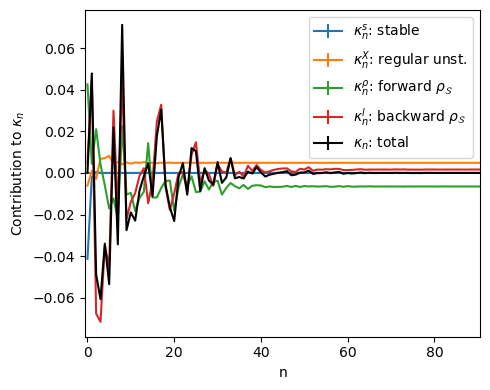

In [8]:
# plot(LRTs + LRTu_pts + LRTu_edges + LRTu_fwd)
figure(figsize=(5,4))
for (leg,LRTv,c) = (("\$\\kappa^s_n\$: stable",LRTs,"C0"),
                    ("\$\\kappa^X_n\$: regular unst.",LRTu_dX,"C1"),
                    ("\$\\kappa^\\rho_n\$: forward \$\\rho_\\mathcal{S}\$",LRTu_dr,"C2"),
                    ("\$\\kappa^l_n\$: backward \$\\rho_\\mathcal{S}\$",LRTu_dl,"C3"),
                    ("\$\\kappa_n\$: total",LRT,"k")#,LRT_naive
    )
    errorbar(0:K-1,Float64.(mean(LRTv,dims=2)),2Float64.(mapslices(sem,LRTv,dims=2)),label=leg,c=c)
end
legend()
xlabel("n");ylabel("Contribution to \$\\kappa_n\$")
# plot(resp_file[1:K],"kx-")
plot(-1:K,zeros(K+2),"--",c="gray")
xlim(-0.5,K-3/2)
# ylim(-0.04,0.04)
tight_layout()
savefig("../figures/Susceptibility.pdf")


In [21]:
# println("Stable (LY) dimension = $(Float64(round(-lyapunov_exponents[1]/diff(lyapunov_exponents)[1],digits=4)))")
LRTcutoff = findlast(vec(abs.(mLRT) .> 3sLRT))
println("LRT cutoff = $LRTcutoff")
# mean(LRT,dims=1)
totalLRT = sum(LRT[:,1:LRTcutoff],dims=1)
mtotalLRT, stotalLRT = mean(totalLRT), sem(totalLRT)

LRT cutoff = 90


(-0.175565486272132131030148248820175, 0.00018379053299098158714468011037844)

In [77]:
mean(LRTu_dl,dims=1)

1×90 Array{BigFloat,2}:
 0.0048618  0.0444215  -0.0675705  …  0.00164589  0.00158796  0.0016403

In [24]:
[vec(mLRT) 2vec(sLRT)]

60×2 Array{Float64,2}:
  0.000188537  0.000265665
  0.0479501    0.000308815
 -0.0486924    0.000273413
 -0.0608654    0.000246432
 -0.0340201    0.000270845
 -0.0534726    0.000349324
  0.0217337    0.000327124
 -0.0341069    0.00035182
  0.0710841    0.00025845
 -0.027166     0.00044776
 -0.0191183    0.000348171
 -0.0228759    0.00034676
 -0.00833073   0.000323263
  ⋮            
 -0.00090579   0.000365309
  0.00019665   0.000422137
  0.000257638  0.000425114
  0.00136733   0.000439745
 -0.000541618  0.000362945
  0.000548519  0.000356395
 -0.000167678  0.000389493
  0.000233031  0.000375843
 -0.000372601  0.00036128
  0.000650929  0.000389616
  0.000997914  0.000368202
 -0.000593631  0.000361936